# Proyecto de analisís de datos - Predecir la decersión de los estudiantes

## Pasos para estudio:

1. Carga de datos
2. Exploración de datos
3. Limpieza y preparación de los datos
4. Estudio de las variables 
5. Procesamiento de datos
6. Implementación de modelos predictivos 
7. Evaluación de modelos predictivos
8. Evaluación sobre el test set
9. Conclusión

### Carga de datos 

In [307]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [308]:
# Lectura de datos 
df = pd.read_csv('dataset.csv')

In [309]:
#Division de datos de entrenamiento y prueba
train_df, test_df = sklearn.model_selection.train_test_split(df, test_size=0.30)

In [310]:
#Guardar datos de entrenamiento y prueba 
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [311]:
train_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1607,1,1,6,12,1,1,1,4,3,3,...,0,8,9,8,12.8875,1,9.4,-0.8,-3.12,Graduate
633,1,12,1,13,1,1,1,23,28,29,...,0,8,13,7,11.7000,0,12.7,3.7,-1.70,Graduate
4274,1,1,1,11,1,1,1,22,14,10,...,0,6,8,5,12.6000,0,7.6,2.6,0.32,Enrolled
4173,1,1,2,12,1,1,1,22,27,8,...,0,8,8,8,15.0000,0,11.1,0.6,2.02,Graduate
2581,1,12,1,4,1,1,1,23,28,5,...,0,6,8,0,0.0000,0,15.5,2.8,-4.06,Dropout


In [312]:
test_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1235,1,12,1,17,0,1,1,13,28,8,...,0,5,9,3,11.000000,0,10.8,1.4,1.74,Dropout
1294,2,12,1,4,1,1,1,1,31,10,...,0,6,0,0,0.000000,0,12.4,0.5,1.79,Dropout
1322,1,1,5,12,1,1,1,23,28,10,...,0,8,8,8,13.763750,0,9.4,-0.8,-3.12,Graduate
3390,1,8,1,16,1,1,1,23,28,10,...,0,7,7,7,12.285714,0,16.2,0.3,-0.92,Graduate
326,1,14,1,12,1,6,1,1,27,10,...,0,7,7,6,13.333333,0,7.6,2.6,0.32,Graduate


## Exploración

In [313]:
#que columna tienen los datos 
train_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [314]:
#que tamaño tienen los datos
train_df.shape

(3096, 35)

In [315]:
#Hay valores de datos nulos
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 1607 to 242
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3096 non-null   int64  
 1   Application mode                                3096 non-null   int64  
 2   Application order                               3096 non-null   int64  
 3   Course                                          3096 non-null   int64  
 4   Daytime/evening attendance                      3096 non-null   int64  
 5   Previous qualification                          3096 non-null   int64  
 6   Nacionality                                     3096 non-null   int64  
 7   Mother's qualification                          3096 non-null   int64  
 8   Father's qualification                          3096 non-null   int64  
 9   Mother's occupation                    

Total columnas: 35 

Total de filas: 3318

Tipos de datos: float64 (5), int64(29), object (1)

In [316]:
#como se distribuyen las variables 
train_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,...,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,1.177326,6.897610,1.737080,9.864664,0.890827,2.495801,1.276163,12.265827,16.318475,7.262597,...,0.139858,0.552003,6.239341,8.011628,4.445736,10.205915,0.144380,11.604780,1.217862,-0.016631
std,0.599851,5.263725,1.319664,4.330390,0.311907,3.915090,1.837404,9.030915,11.064446,3.926774,...,0.690681,1.919177,2.203511,3.920765,3.036498,5.234592,0.751189,2.665833,1.378021,2.275456
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,17.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [317]:
#como se comportan las variables categoricas
train_df.describe(include=['O'])

,Target
count,3096
unique,3
top,Graduate
freq,1558


## Limpieza de datos

### Datos nulos

In [318]:
train_df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [319]:
train_df.duplicated().sum()

0

In [320]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 1607 to 242
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3096 non-null   int64  
 1   Application mode                                3096 non-null   int64  
 2   Application order                               3096 non-null   int64  
 3   Course                                          3096 non-null   int64  
 4   Daytime/evening attendance                      3096 non-null   int64  
 5   Previous qualification                          3096 non-null   int64  
 6   Nacionality                                     3096 non-null   int64  
 7   Mother's qualification                          3096 non-null   int64  
 8   Father's qualification                          3096 non-null   int64  
 9   Mother's occupation                    

## Estudio de las variables

In [321]:
import seaborn as sns

In [322]:
train_df['Target'].value_counts()

Graduate    1558
Dropout      983
Enrolled     555
Name: Target, dtype: int64

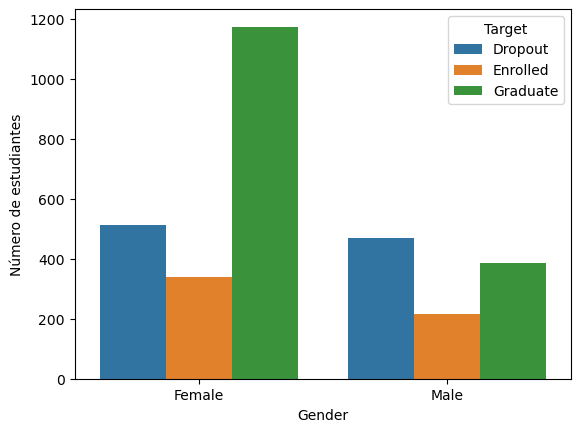

In [324]:
# Género que influye en el éxito académico
sns.countplot(data=train_df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Número de estudiantes')
plt.show()

Según la data las mujeres tienen mayor cantidad de graduados en comparación con los hombres.

In [325]:
train_df.groupby(['Gender']).count()['Target']

Gender
0    2026
1    1070
Name: Target, dtype: int64

<Axes: ylabel='Course'>

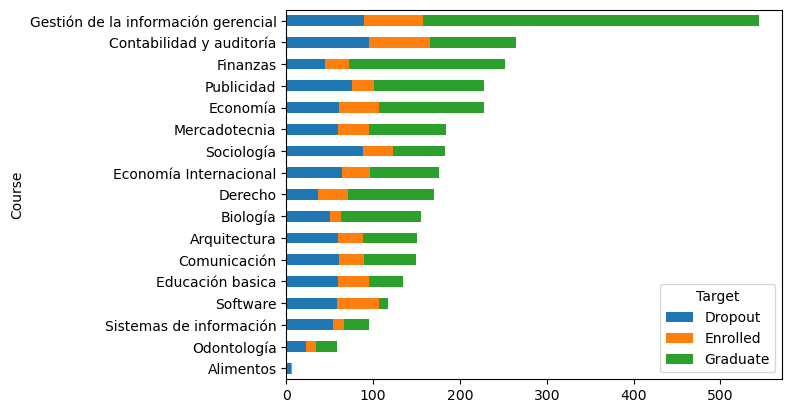

In [326]:
student_course=train_df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

#Cambiamos el nombre del dataFrame
student_course = student_course.rename(index={
    1:'Alimentos',
    2:'Arquitectura',
    3:'Biología',
    4:'Comunicación',
    5:'Derecho',
    6:'Economía',
    7:'Software',
    8:'Sistemas de información',
    9:'Contabilidad y auditoría',
    10:'Finanzas',
    11:'Economía Internacional',
    12:'Gestión de la información gerencial',
    13:'Odontología',
    14:'Mercadotecnia',
    15:'Publicidad',
    16:'Educación basica',
    17:'Sociología'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

El curso de Gestión de la Información Gerencial tuvo mayor número de personas graduadas, mientras que el curso de contabilidad generó el mayor número de abandonos. 

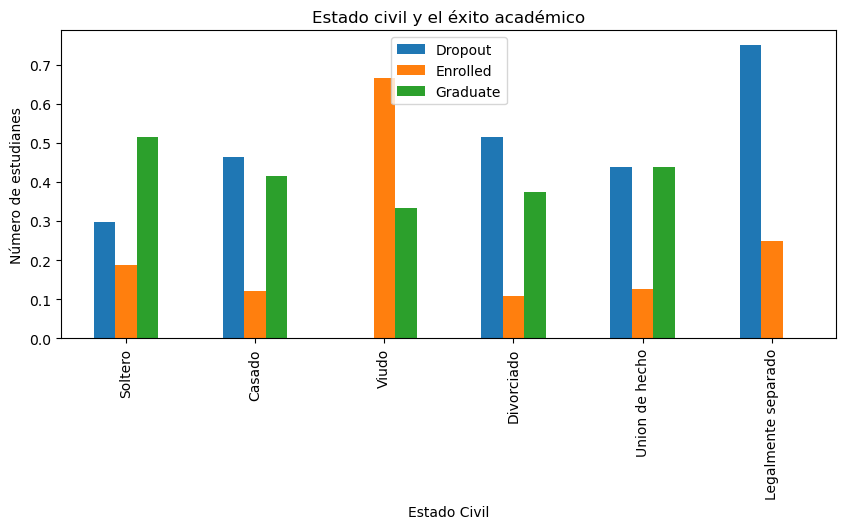

In [327]:
# Estado civil que influye en el éxito academico
pd.crosstab(train_df["Marital status"], train_df["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Estado civil y el éxito académico" )
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Soltero', 'Casado', 'Viudo', 'Divorciado', 'Union de hecho', 'Legalmente separado'])

plt.xlabel('Estado Civil')
plt.ylabel('Número de estudianes')
plt.legend(loc=9)
plt.show()

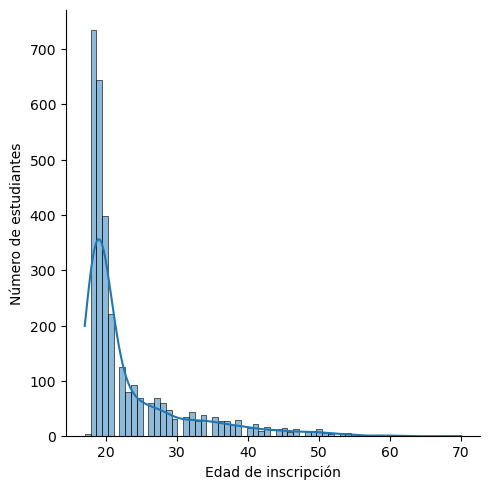

In [328]:
# Edad de inscripción que influye en el éxito académico
sns.displot(data=train_df, x='Age at enrollment', kde=True)
train_df['Age at enrollment'].describe()

plt.xlabel('Edad de inscripción')
plt.ylabel('Número de estudiantes')
plt.show()

La mayoría de estudiantes matriculados tiene aproximadamente la edad de 20 años. 

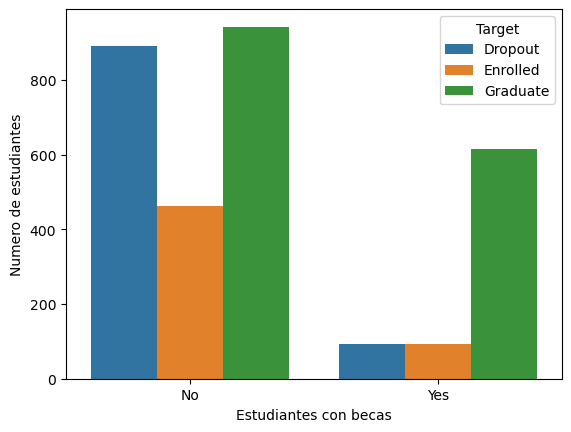

In [329]:
# Estudiantes con becas y el éxito académico
sns.countplot(data=train_df, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Estudiantes con becas')
plt.ylabel('Numero de estudiantes')
plt.show()

# Procesamiento de datos

Seleccionamos las variables con las que vamos a trabajar
1. Target
2. Gender
3. Course 
4. Marital status
5. Age at enrollment
6. Scholarship holder

In [330]:
train_df[['Target','Gender','Course','Marital status','Age at enrollment','Scholarship holder']].head(20)

,Target,Gender,Course,Marital status,Age at enrollment,Scholarship holder
1607,Graduate,1,12,1,18,0
633,Graduate,0,13,1,24,1
4274,Enrolled,1,11,1,25,0
4173,Graduate,0,12,1,20,1
2581,Dropout,0,4,1,27,0
301,Graduate,0,6,1,21,1
3115,Graduate,0,10,1,19,1
140,Graduate,0,12,1,19,0
1136,Graduate,0,5,1,18,1
2184,Enrolled,0,10,1,19,0


In [331]:
train_df[['Target','Gender','Course','Marital status','Age at enrollment','Scholarship holder']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 1607 to 242
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Target              3096 non-null   object
 1   Gender              3096 non-null   int64 
 2   Course              3096 non-null   int64 
 3   Marital status      3096 non-null   int64 
 4   Age at enrollment   3096 non-null   int64 
 5   Scholarship holder  3096 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 233.9+ KB


In [333]:
train_df=train_df[train_df.Target!='Enrolled']

In [334]:
# map para label encoding
train_df['Target'] = train_df['Target'].map({'Graduate': 0, 'Dropout': 1}).astype(int)

In [335]:
train_df['Target'].value_counts()

0    1558
1     983
Name: Target, dtype: int64

In [336]:
train_df[['Target','Gender','Course','Marital status','Age at enrollment','Scholarship holder']].head(20)

,Target,Gender,Course,Marital status,Age at enrollment,Scholarship holder
1607,0,1,12,1,18,0
633,0,0,13,1,24,1
4173,0,0,12,1,20,1
2581,1,0,4,1,27,0
301,0,0,6,1,21,1
3115,0,0,10,1,19,1
140,0,0,12,1,19,0
1136,0,0,5,1,18,1
1423,0,0,11,1,18,0
465,1,0,3,1,27,0


In [337]:
#Variable dependiente 
Y_train_df = train_df['Target']

# preprocesamiento de variables independientes
features = ['Gender', 'Course','Marital status','Age at enrollment','Scholarship holder']
X_train_df = train_df[features]

print(Y_train_df.shape, X_train_df.shape)

(2541,) (2541, 5)


## Implementación de modelos Predicctivos

In [338]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_df, Y_train_df)

LogisticRegression()

In [339]:
# entrenando modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_df, Y_train_df)

DecisionTreeClassifier()

## Evaluación de modelos predictivos

In [340]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def conf_mat_acc(modelo, X_train_df, Y_train_df):
    y_pred = modelo.predict(X_train_df)
    cm = confusion_matrix(Y_train_df, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_train_df))
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    
    true_pred = cm[0, 0] + cm[1, 1]
    total_data = np.sum(cm)
    accuracy = true_pred / total_data
    print('accuracy:', np.round(accuracy, 2))
    
    plt.show()

accuracy: 0.69


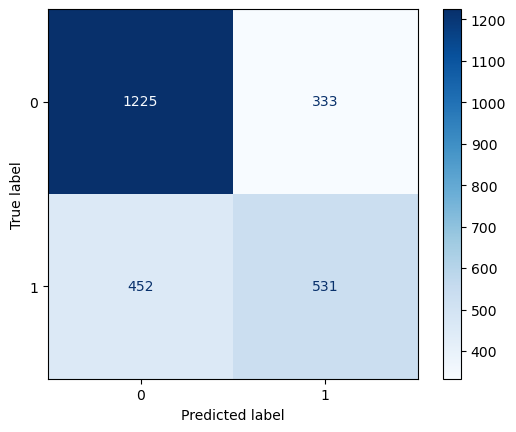

In [341]:
conf_mat_acc(logreg, X_train_df, Y_train_df)

accuracy: 0.83


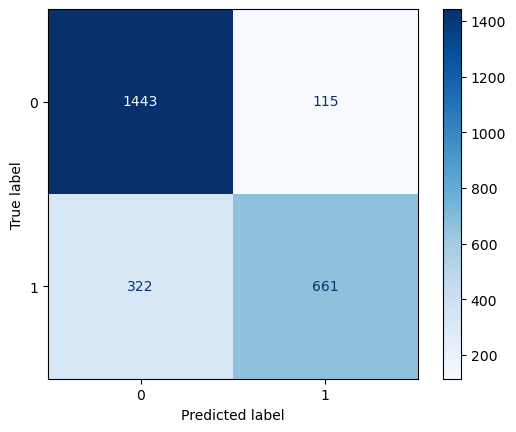

In [345]:
conf_mat_acc(decision_tree, X_train_df, Y_train_df)

## Evaluación sobre el Test set

In [346]:
# ahora hay que preparar el test set para evaluación
print(test_df.head(3))
test_df.info()

      Marital status  Application mode  Application order  Course  \
1235               1                12                  1      17   
1294               2                12                  1       4   
1322               1                 1                  5      12   

      Daytime/evening attendance  Previous qualification  Nacionality  \
1235                           0                       1            1   
1294                           1                       1            1   
1322                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
1235                      13                      28                    8   
1294                       1                      31                   10   
1322                      23                      28                   10   

      ...  Curricular units 2nd sem (credited)  \
1235  ...                                    0   
1294  ...            

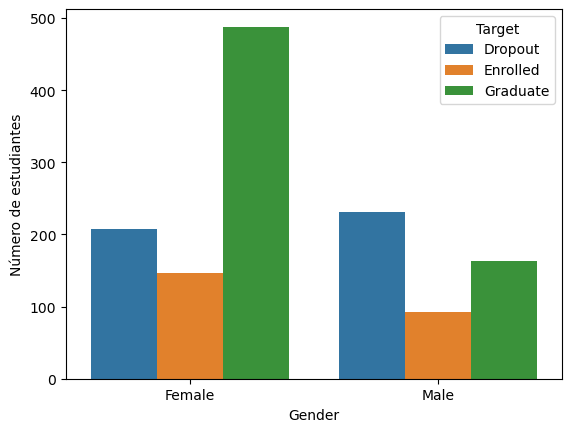

In [348]:
# preprocesando test set
sns.countplot(data=test_df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Número de estudiantes')
plt.show()

In [349]:
test_df=test_df[test_df.Target!='Enrolled']

In [350]:
# map para label encoding
test_df['Target'] = test_df['Target'].map({'Graduate': 0, 'Dropout': 1}).astype(int)

In [351]:
# crear test set 
X_test_df = test_df[features]

print(X_test_df.shape)

(1089, 5)


In [352]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test_df)
Y_pred_tree = decision_tree.predict(X_test_df)
print(Y_pred_log[0:10])

[0 1 0 0 0 0 1 1 0 0]
